<a href="https://colab.research.google.com/github/haricharanvihari/extensive_viz/blob/master/S11_DNN/S11_EVA4S11F10_Haricharan_Vihari_N_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cyclic Curve

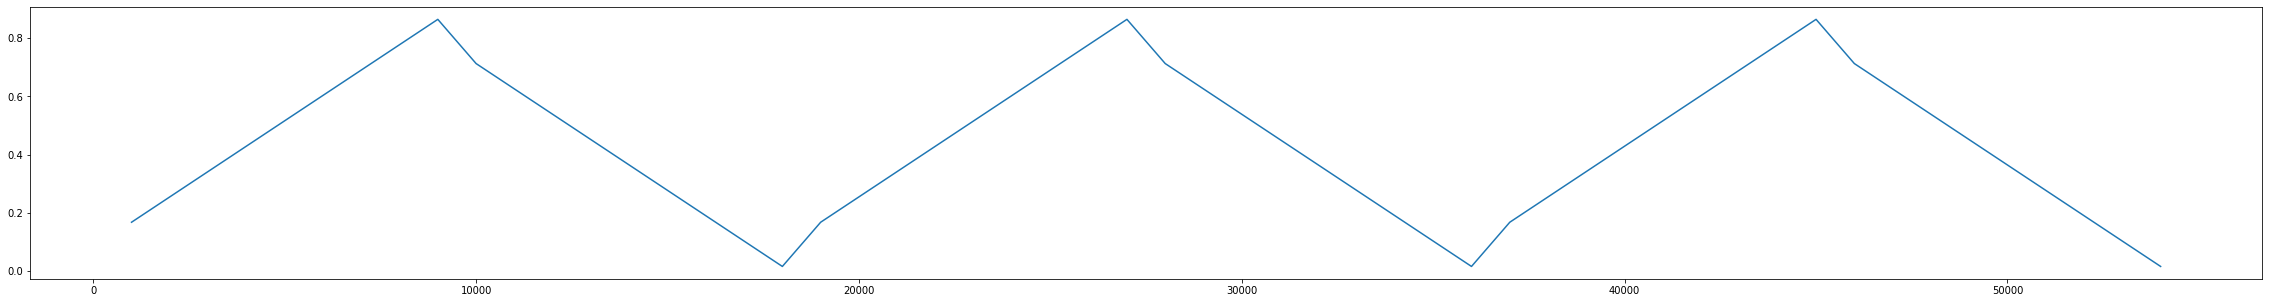

In [1]:
from cycliclr import plot_cyclic_curve

iterations = 10010
stepsize = 1000
lr_min = 0.08
lr_max = 0.8

plot_cyclic_curve(iterations, stepsize, lr_min, lr_max)

## Model

In [2]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.ResnetNew11 import ResnetNew_Cifar10DNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResnetNew_Cifar10DNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Run the Model

In [0]:
%matplotlib inline

In [4]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import OneCycleLR

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

dm = DataModel(img_data, criterion, optimizer, None, num_of_epochs = 24, cal_misclassified = True)

  pip install torch-lr-finder -v --global-option="amp"


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


### Find LR Max

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


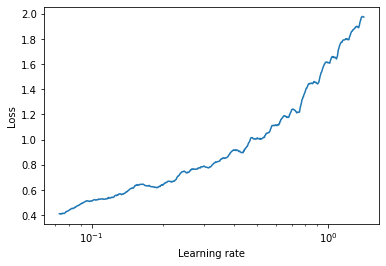

In [8]:
lr = dm.find_lr_max(model, device)

### LR Max

In [9]:
print(lr)

0.07149985971510461


## Run Model

In [10]:
# training the dataset and then running test
scheduler = OneCycleLR(optimizer, max_lr=lr, epochs=24, steps_per_epoch = len(img_data.trainloader), 
                          anneal_strategy='cos',
                          base_momentum=0.85,
                          cycle_momentum=True,
                          div_factor=10,
                          final_div_factor=10000.0,
                          last_epoch=-1,
                          max_momentum=0.95,
                          pct_start=0.3
                        )
dm.schedular = scheduler
dm.optimizer = optim_sgd.load(params=model.parameters(), lr=lr/8, momentum=0.9, weight_decay=0.005)
dm.run_model(model, device)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Loss=0.24172313511371613 Batch_id=97 Accuracy=90.20: 100%|██████████| 98/98 [00:15<00:00,  6.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8945/10000 (89.45%)

EPOCH: 2


Loss=0.2553408145904541 Batch_id=97 Accuracy=92.37: 100%|██████████| 98/98 [00:15<00:00,  6.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9024/10000 (90.24%)

EPOCH: 3


Loss=0.20958995819091797 Batch_id=97 Accuracy=93.15: 100%|██████████| 98/98 [00:15<00:00,  6.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9049/10000 (90.49%)

EPOCH: 4


Loss=0.19941070675849915 Batch_id=97 Accuracy=93.85: 100%|██████████| 98/98 [00:15<00:00,  6.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9035/10000 (90.35%)

EPOCH: 5


Loss=0.16033849120140076 Batch_id=97 Accuracy=94.26: 100%|██████████| 98/98 [00:15<00:00,  6.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9046/10000 (90.46%)

EPOCH: 6


Loss=0.17244206368923187 Batch_id=97 Accuracy=94.76: 100%|██████████| 98/98 [00:15<00:00,  6.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9021/10000 (90.21%)

EPOCH: 7


Loss=0.15918698906898499 Batch_id=97 Accuracy=95.11: 100%|██████████| 98/98 [00:15<00:00,  6.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9020/10000 (90.20%)

EPOCH: 8


Loss=0.1427488923072815 Batch_id=97 Accuracy=95.30: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8931/10000 (89.31%)

EPOCH: 9


Loss=0.1251911222934723 Batch_id=97 Accuracy=95.52: 100%|██████████| 98/98 [00:15<00:00,  6.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8974/10000 (89.74%)

EPOCH: 10


Loss=0.17418844997882843 Batch_id=97 Accuracy=95.69: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8969/10000 (89.69%)

EPOCH: 11


Loss=0.15567293763160706 Batch_id=97 Accuracy=95.71: 100%|██████████| 98/98 [00:15<00:00,  6.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8992/10000 (89.92%)

EPOCH: 12


Loss=0.11279325187206268 Batch_id=97 Accuracy=95.90: 100%|██████████| 98/98 [00:15<00:00,  6.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8994/10000 (89.94%)

EPOCH: 13


Loss=0.14937609434127808 Batch_id=97 Accuracy=95.75: 100%|██████████| 98/98 [00:15<00:00,  6.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9000/10000 (90.00%)

EPOCH: 14


Loss=0.1479438990354538 Batch_id=97 Accuracy=95.86: 100%|██████████| 98/98 [00:15<00:00,  6.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8863/10000 (88.63%)

EPOCH: 15


Loss=0.1331346333026886 Batch_id=97 Accuracy=95.87: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8758/10000 (87.58%)

EPOCH: 16


Loss=0.12276393175125122 Batch_id=97 Accuracy=95.98: 100%|██████████| 98/98 [00:15<00:00,  6.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8810/10000 (88.10%)

EPOCH: 17


Loss=0.1411890983581543 Batch_id=97 Accuracy=95.96: 100%|██████████| 98/98 [00:15<00:00,  6.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8959/10000 (89.59%)

EPOCH: 18


Loss=0.1549207866191864 Batch_id=97 Accuracy=95.96: 100%|██████████| 98/98 [00:15<00:00,  6.28it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8851/10000 (88.51%)

EPOCH: 19


Loss=0.12750917673110962 Batch_id=97 Accuracy=95.97: 100%|██████████| 98/98 [00:15<00:00,  6.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8902/10000 (89.02%)

EPOCH: 20


Loss=0.08946482092142105 Batch_id=97 Accuracy=96.14: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8764/10000 (87.64%)

EPOCH: 21


Loss=0.13232539594173431 Batch_id=97 Accuracy=96.09: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8824/10000 (88.24%)

EPOCH: 22


Loss=0.14632077515125275 Batch_id=97 Accuracy=95.92: 100%|██████████| 98/98 [00:15<00:00,  6.21it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8955/10000 (89.55%)

EPOCH: 23


Loss=0.13658778369426727 Batch_id=97 Accuracy=96.17: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8959/10000 (89.59%)

EPOCH: 24


Loss=0.12453120946884155 Batch_id=97 Accuracy=96.23: 100%|██████████| 98/98 [00:15<00:00,  6.28it/s]



Test set: Average loss: 0.0007, Accuracy: 8851/10000 (88.51%)



## Plotting Test & Train Accuracy

[10.82, 15.414, 25.402, 35.548, 45.782, 54.642, 63.256, 71.846, 75.734, 78.368, 79.86, 80.776, 81.604, 82.3, 82.93, 83.366, 83.652, 83.794, 83.98, 84.358, 84.406, 84.688, 84.87, 85.178, 90.202, 92.366, 93.15, 93.854, 94.26, 94.764, 95.108, 95.298, 95.516, 95.694, 95.706, 95.904, 95.748, 95.862, 95.872, 95.978, 95.958, 95.962, 95.97, 96.142, 96.086, 95.922, 96.172, 96.226]
[12.74, 14.56, 27.44, 40.14, 48.28, 51.29, 61.68, 60.17, 63.72, 72.2, 68.02, 76.8, 77.27, 61.1, 79.44, 68.07, 73.85, 75.58, 75.73, 71.81, 70.89, 69.16, 79.85, 78.77, 89.45, 90.24, 90.49, 90.35, 90.46, 90.21, 90.2, 89.31, 89.74, 89.69, 89.92, 89.94, 90.0, 88.63, 87.58, 88.1, 89.59, 88.51, 89.02, 87.64, 88.24, 89.55, 89.59, 88.51]


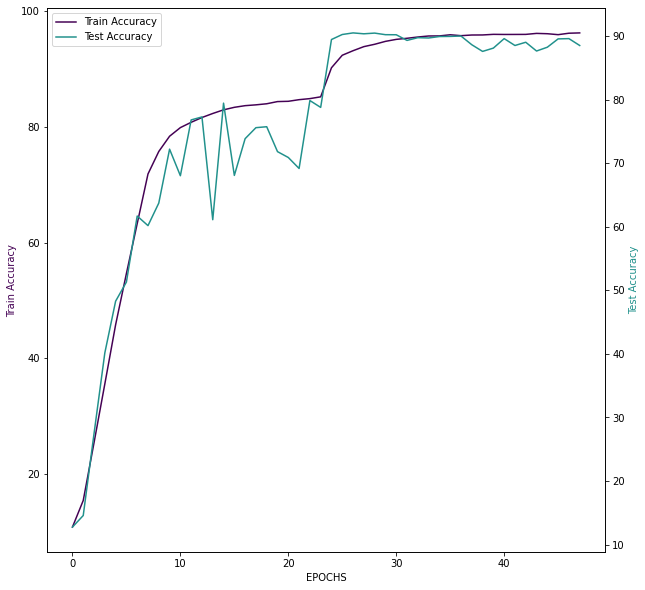

In [11]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

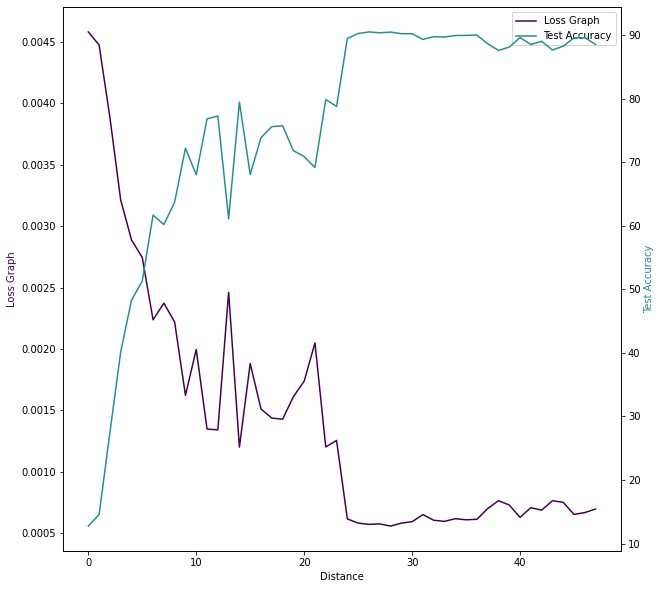

In [12]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

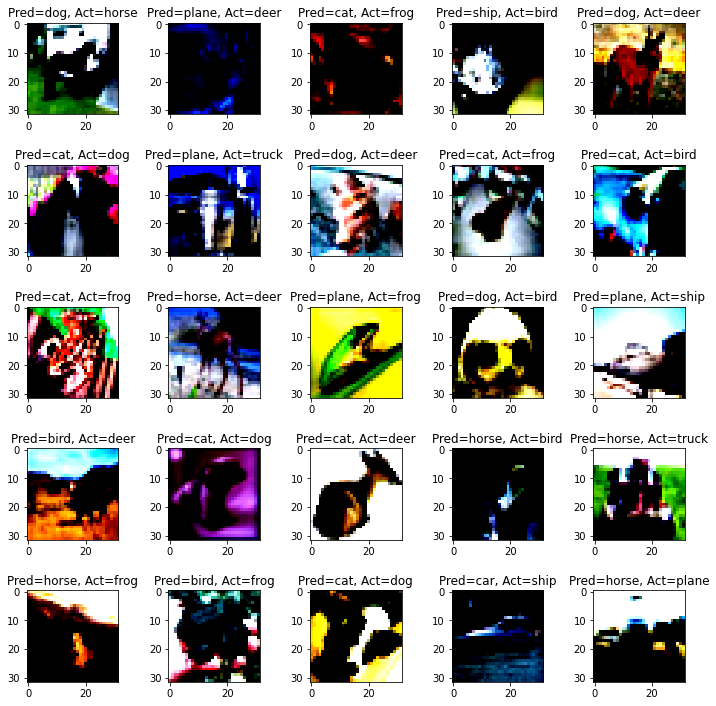

In [14]:
dm.plot_misclassified()

/content/gradcam.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw={'xticks': [], 'yticks': []})


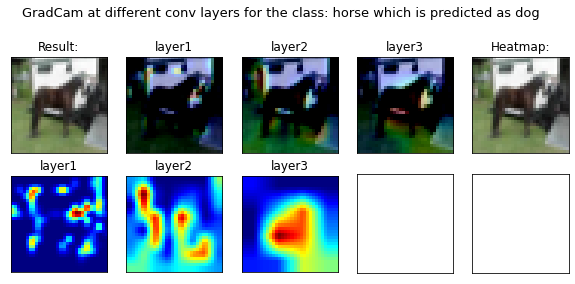

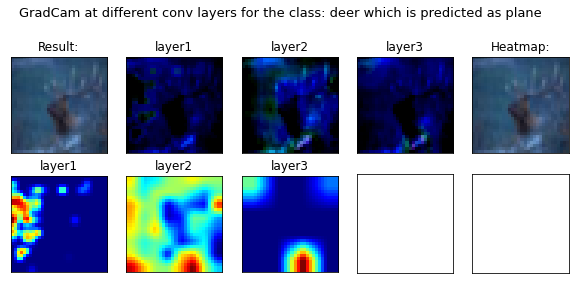

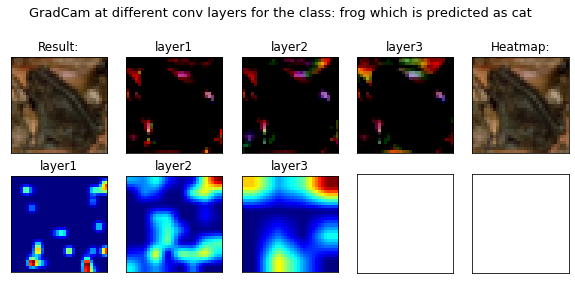

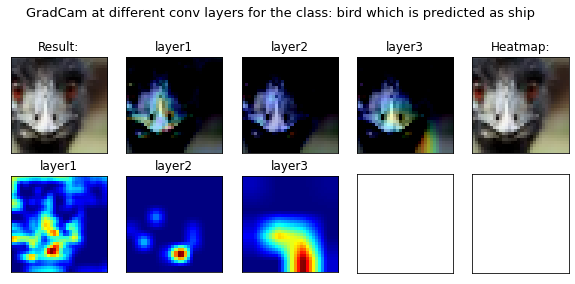

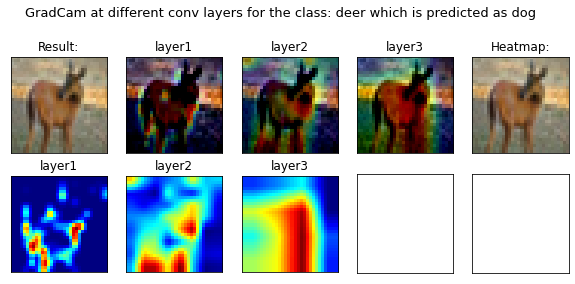

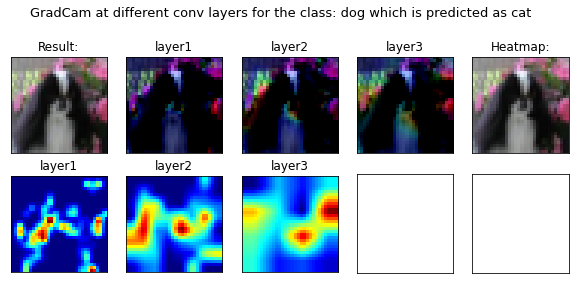

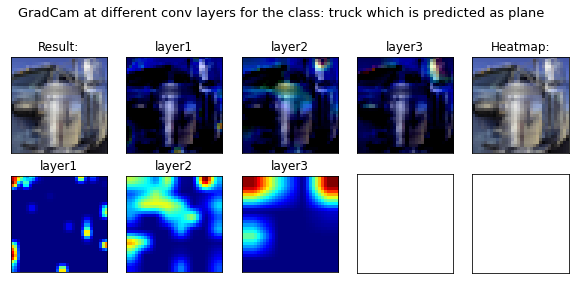

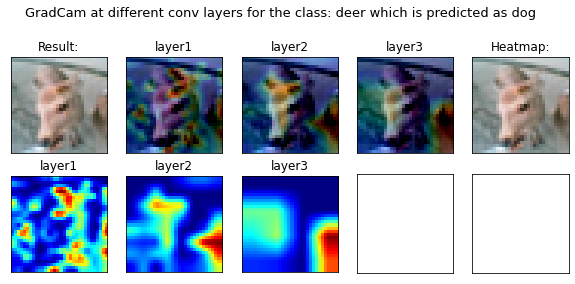

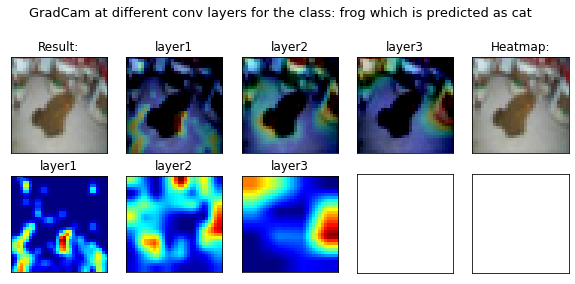

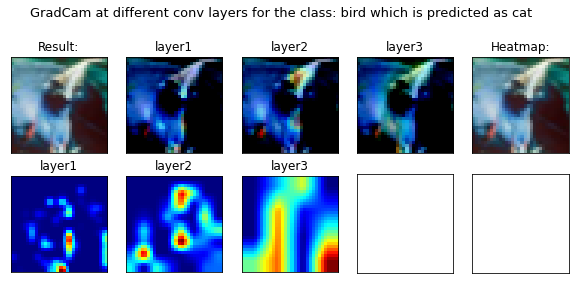

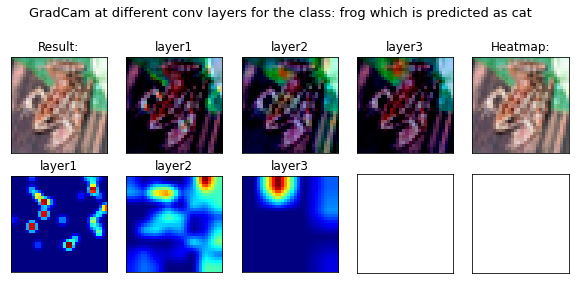

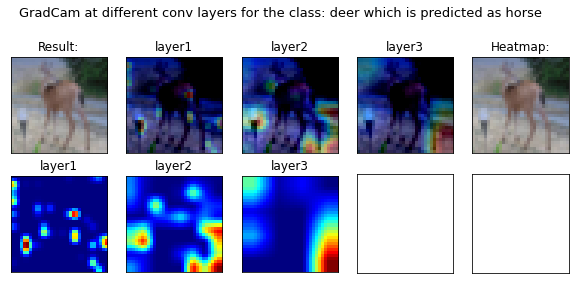

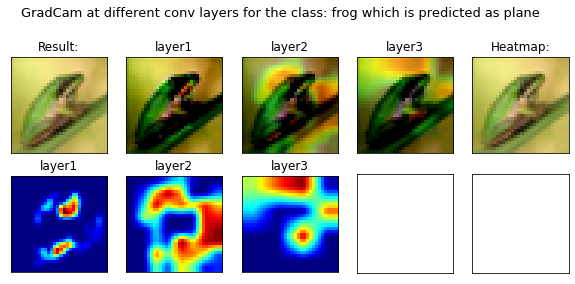

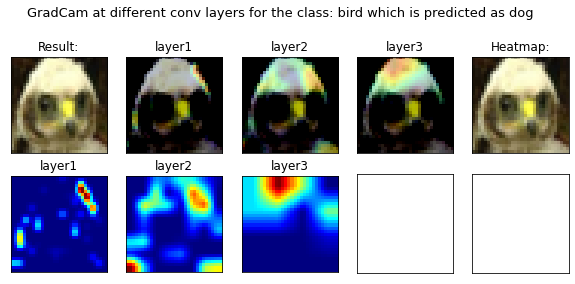

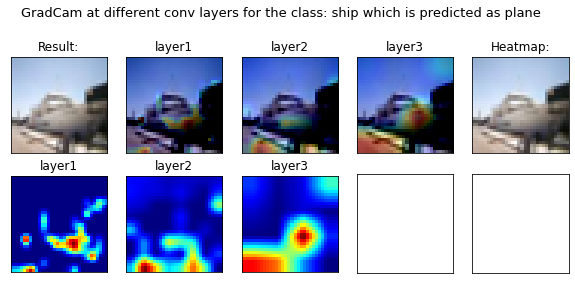

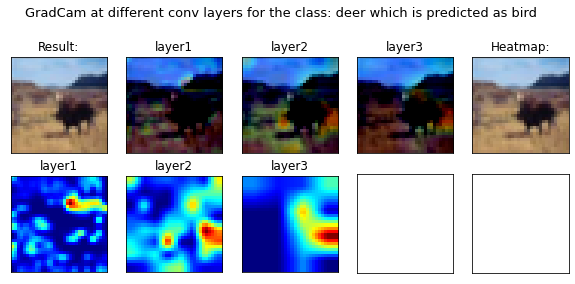

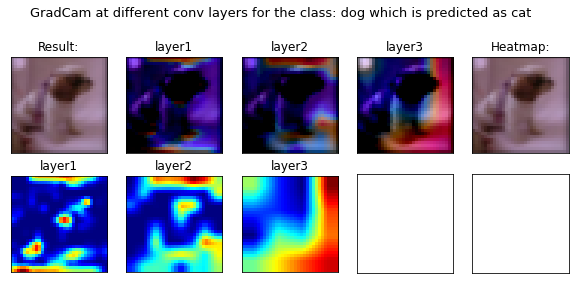

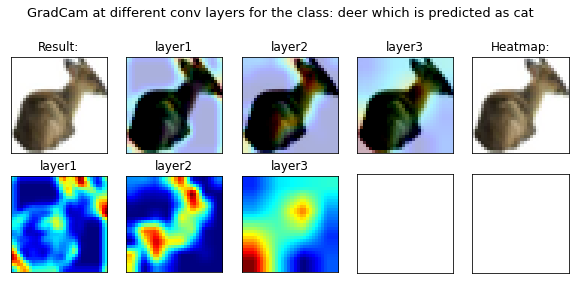

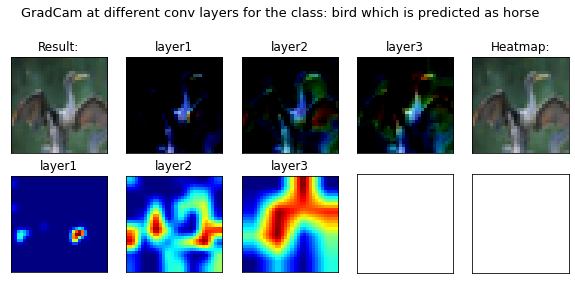

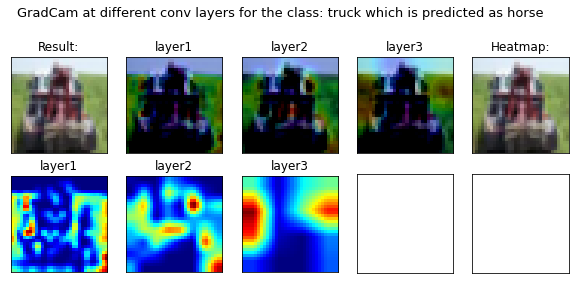

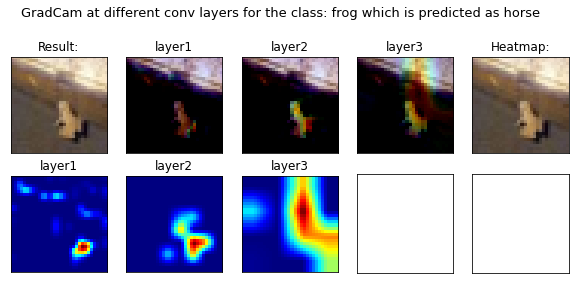

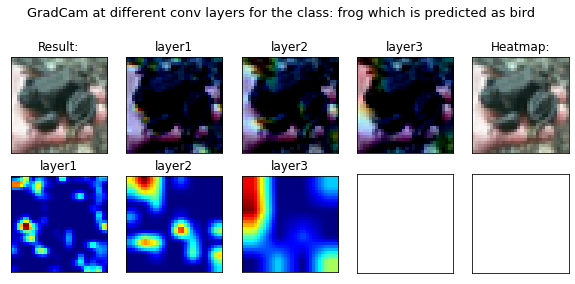

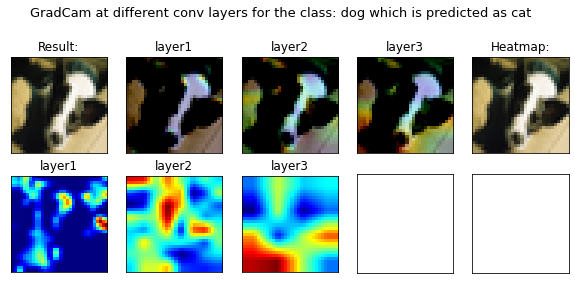

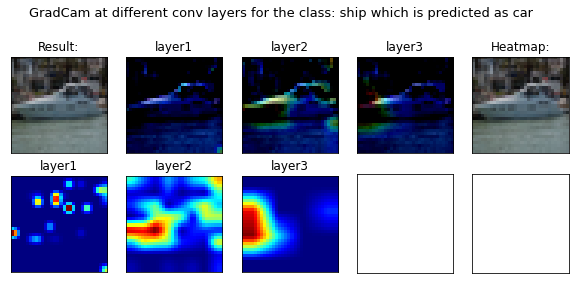

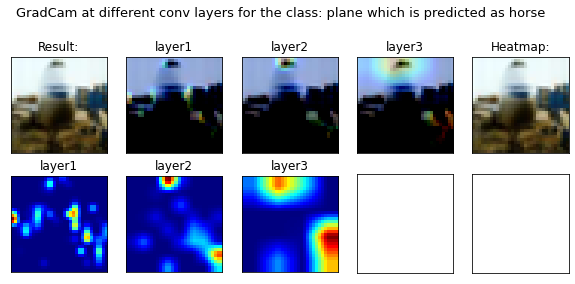

In [15]:
dm.plot_GRADcam(["layer1","layer2","layer3"])